In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data =pd.read_csv('data/bike_sharing_data/merged_data.csv')

In [5]:
data.head()

,Duration,Start date,End date,Start station number,Member type
0,892,2018-02-01 00:01:29,2018-02-01 00:16:21,31312,Member
1,501,2018-02-01 00:04:19,2018-02-01 00:12:40,31089,Member
2,788,2018-02-01 00:05:03,2018-02-01 00:18:12,32048,Member
3,406,2018-02-01 00:18:11,2018-02-01 00:24:57,31224,Member
4,161,2018-02-01 00:18:11,2018-02-01 00:20:53,31126,Member


In [6]:
data.tail()

,Duration,Start date,End date,Start station number,Member type
7147376,139,2020-02-29 23:56:58,2020-02-29 23:59:17,31917,Member
7147377,388,2020-02-29 23:57:00,2020-03-01 00:03:29,31236,Member
7147378,373,2020-02-29 23:58:42,2020-03-01 00:04:56,31283,Member
7147379,597,2020-02-29 23:58:58,2020-03-01 00:08:55,31214,Member
7147380,983,2020-02-29 23:59:19,2020-03-01 00:15:43,31125,Casual


In [7]:
data.shape

(7147381, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7147381 entries, 0 to 7147380
Data columns (total 5 columns):
Duration                int64
Start date              object
End date                object
Start station number    int64
Member type             object
dtypes: int64(2), object(3)
memory usage: 272.7+ MB


In [9]:
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Member type'],
      dtype='object')

In [10]:
data['Start station number'].nunique()

583

In [13]:
count=pd.DataFrame(data['Start station number'].value_counts().nlargest(10))

In [14]:
count=count.reset_index()

In [15]:
count.columns

Index(['index', 'Start station number'], dtype='object')

In [16]:
count.columns=['Start station number','Total_trip']

In [17]:
count.head(10)

,Start station number,Total_trip
0,31623,125727
1,31258,90592
2,31247,77215
3,31201,76685
4,31288,76242
5,31289,76206
6,31248,71639
7,31200,69179
8,31229,69076
9,31124,67272


In [18]:
count_type=pd.DataFrame(data.groupby(['Start station number','Member type'])['Start station number'].count().rename('count_by_membership'))

In [19]:
count_type=count_type.reset_index()

In [20]:
count_type.head()

,Start station number,Member type,count_by_membership
0,0,Casual,34
1,0,Member,742
2,31000,Casual,1180
3,31000,Member,2855
4,31001,Casual,851


In [21]:
barWidth = 0.25

In [22]:
cleaned_data=count

In [23]:
casual=count_type[count_type['Member type']=='Casual']

In [24]:
member=count_type[count_type['Member type']=='Member']

In [25]:
cleaned_data.head()

,Start station number,Total_trip
0,31623,125727
1,31258,90592
2,31247,77215
3,31201,76685
4,31288,76242


In [26]:
casual.head()

,Start station number,Member type,count_by_membership
0,0,Casual,34
2,31000,Casual,1180
4,31001,Casual,851
6,31002,Casual,2178
8,31003,Casual,1683


In [27]:
member.head()

,Start station number,Member type,count_by_membership
1,0,Member,742
3,31000,Member,2855
5,31001,Member,3616
7,31002,Member,9834
9,31003,Member,7624


In [28]:
d=count.merge(casual, on='Start station number', how='inner', indicator=True)

In [29]:
d.columns

Index(['Start station number', 'Total_trip', 'Member type',
       'count_by_membership', '_merge'],
      dtype='object')

In [30]:
d=d[['Start station number','Total_trip','count_by_membership']]

In [31]:
d=d.merge(member, on='Start station number', how='inner', indicator=True)

In [32]:
d.columns

Index(['Start station number', 'Total_trip', 'count_by_membership_x',
       'Member type', 'count_by_membership_y', '_merge'],
      dtype='object')

In [33]:
d=d[['Start station number', 'Total_trip', 'count_by_membership_x','count_by_membership_y']]

In [34]:
d

,Start station number,Total_trip,count_by_membership_x,count_by_membership_y
0,31623,125727,9818,115909
1,31258,90592,54572,36020
2,31247,77215,44676,32539
3,31201,76685,5080,71605
4,31288,76242,42512,33730
5,31289,76206,44810,31396
6,31248,71639,40462,31177
7,31200,69179,9678,59501
8,31229,69076,3362,65714
9,31124,67272,3735,63537


In [35]:
pos = list(range(len(d))) 
width = 0.25 

<BarContainer object of 10 artists>

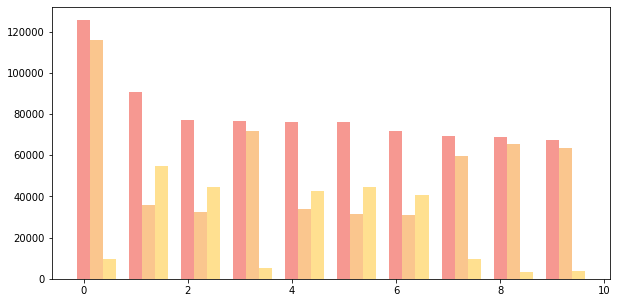

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        d['Total_trip'], 
        width, 
        alpha=0.5, 
        color='#EE3224', 
        label=d['Start station number'][0]) 

plt.bar([p + width*2 for p in pos], 
        d['count_by_membership_x'], 
        width, 
        alpha=0.5, 
        color='#FFC222', 
        label=d['Start station number'][1]) 

plt.bar([p + width for p in pos], 
        d['count_by_membership_y'],
        width, 
        alpha=0.5, 
        color='#F78F1E', 
        label=d['Start station number'][2])